In [1]:

import numpy as np 
import pandas as pd



In [2]:
import pandas as pd

df = pd.read_json("News_Category_Dataset_v3.json", lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
len(df)

209527

In [4]:
data_count = df.category.value_counts()
type(data_count)

pandas.core.series.Series

In [5]:
data_count

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [6]:
x = df["headline"].to_numpy()
y = df["category"].to_numpy()

In [7]:
# Visualizing the data
import random

for i in range(0, 10):
    random_x = random.choice(x)
    random_y = y[(x.tolist()).index(random_x)]
    print(f"{random_x} \n {random_y}")

7 Amazing Facts About Tomatoes 
 STYLE & BEAUTY
GOP Debate Will Focus On Economic Issues, Fox Business Pledges 
 POLITICS
James Corden Uses 'Despacito' To Sing A Recap Of This Crazy AF Summer 
 LATINO VOICES
Fat, Fit and Foxy! 
 WELLNESS
Graphic Video Shows Louisiana Officers Open Fire On Vehicle, Killing 6-Year-Old Boy 
 POLITICS
What We Love Is Killing Us and Other Things, Too 
 WELLNESS
Ready To Go To Westeros? 
 TRAVEL
To Be Nothing but Yourself 
 WELLNESS
Nick Kyrgios Wears Kobe Bryant's Jersey Before Australian Open Match 
 ENTERTAINMENT
Painting a Mural 
 HOME & LIVING


In [8]:
# Converting y data to one_hot_encoding
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
y_one_hot_encoded = one_hot_encoder.fit_transform(y.reshape(-1, 1))

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y)

In [10]:
y_label_encoded

array([35, 35,  5, ..., 28, 28, 28])

In [11]:
y_one_hot_encoded[0].toarray(), y_one_hot_encoded.toarray(), y_one_hot_encoded

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 <209527x42 sparse matrix of type '<class 'numpy.float64'>'
 	with 209527 stored elements in Compressed Sparse Row format>)

In [12]:
from sklearn.model_selection import train_test_split

x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(x,
                                                           y_label_encoded,
                                                           test_size=0.2,
                                                           shuffle=True)

len(x_train_l), len(y_train_l), len(x_test_l), len(y_test_l)

(167621, 167621, 41906, 41906)

In [13]:
x_train_l, y_train_l

(array(['Scott Gottlieb Resigns As FDA Commissioner',
        'Introverts Win Gold Medals Too',
        "How I Parent My Hypersensitive Son -- And Why There's Hope For Us Both",
        ...,
        'Service Outages Strike Ahead Of Pacquiao vs. Mayweather Fight',
        'Guy Catches A Massive 1,368-Pound Marlin Off Hawaiian Coast',
        "The Internet Has Collective Chills Over This Teen's Rendition Of 'Hallelujah'"],
       dtype=object),
 array([24, 16, 16, ..., 28, 28, 23]))

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [15]:
model_0 = Pipeline([("tf_idf", TfidfVectorizer()),
                   ("naive_bayes", MultinomialNB())])

model_0.fit(x_train_l, y_train_l)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [16]:
model_0.score(x_test_l, y_test_l)

0.391996372834439

In [17]:
baseline_score = model_0.score(x_test_l, y_test_l)

In [18]:
baseline_score

0.391996372834439

In [19]:
model_0_prediction = model_0.predict(x_test_l)
model_0_prediction

array([24, 10, 38, ..., 10, 34, 24])

In [20]:
y_test_l

array([24, 25, 16, ...,  5, 34, 40])

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
model_0_accuracy_score = accuracy_score(model_0_prediction, y_test_l)

In [23]:
model_0_accuracy_score

0.391996372834439

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import itertools

In [25]:


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [26]:
label_encoder.classes_[24]

'POLITICS'

In [27]:
df.category.value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [28]:
predicted_class = [label_encoder.classes_[single_value] for single_value in model_0_prediction]
true_class = [label_encoder.classes_[single_value] for single_value in y_test_l]
predicted_class[:10], true_class[:10]

(['POLITICS',
  'ENTERTAINMENT',
  'WELLNESS',
  'POLITICS',
  'POLITICS',
  'WELLNESS',
  'WELLNESS',
  'ENTERTAINMENT',
  'ENTERTAINMENT',
  'ENTERTAINMENT'],
 ['POLITICS',
  'QUEER VOICES',
  'HEALTHY LIVING',
  'U.S. NEWS',
  'WORLDPOST',
  'WELLNESS',
  'GREEN',
  'ENTERTAINMENT',
  'MEDIA',
  'ENTERTAINMENT'])

In [29]:
report_dict = classification_report(true_class, predicted_class, output_dict=True)

C:\Users\saika\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saika\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saika\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
new_df = df.category.value_counts().to_frame().sort_index()
new_df

,count
category,
ARTS,1509
ARTS & CULTURE,1339
BLACK VOICES,4583
BUSINESS,5992
COLLEGE,1144
COMEDY,5400
CRIME,3562
CULTURE & ARTS,1074
DIVORCE,3426


In [31]:
pd.concat([pd.DataFrame.from_dict(report_dict).transpose(), new_df], axis=1)

,precision,recall,f1-score,support,count
ARTS,0.000000,0.000000,0.000000,277.000000,1509.0
ARTS & CULTURE,0.000000,0.000000,0.000000,248.000000,1339.0
BLACK VOICES,0.666667,0.002137,0.004260,936.000000,4583.0
BUSINESS,0.836066,0.041531,0.079131,1228.000000,5992.0
COLLEGE,0.000000,0.000000,0.000000,228.000000,1144.0
COMEDY,0.828571,0.027619,0.053456,1050.000000,5400.0
CRIME,0.788462,0.058739,0.109333,698.000000,3562.0
CULTURE & ARTS,0.000000,0.000000,0.000000,227.000000,1074.0
DIVORCE,0.980392,0.073206,0.136240,683.000000,3426.0
EDUCATION,0.000000,0.000000,0.000000,209.000000,1014.0


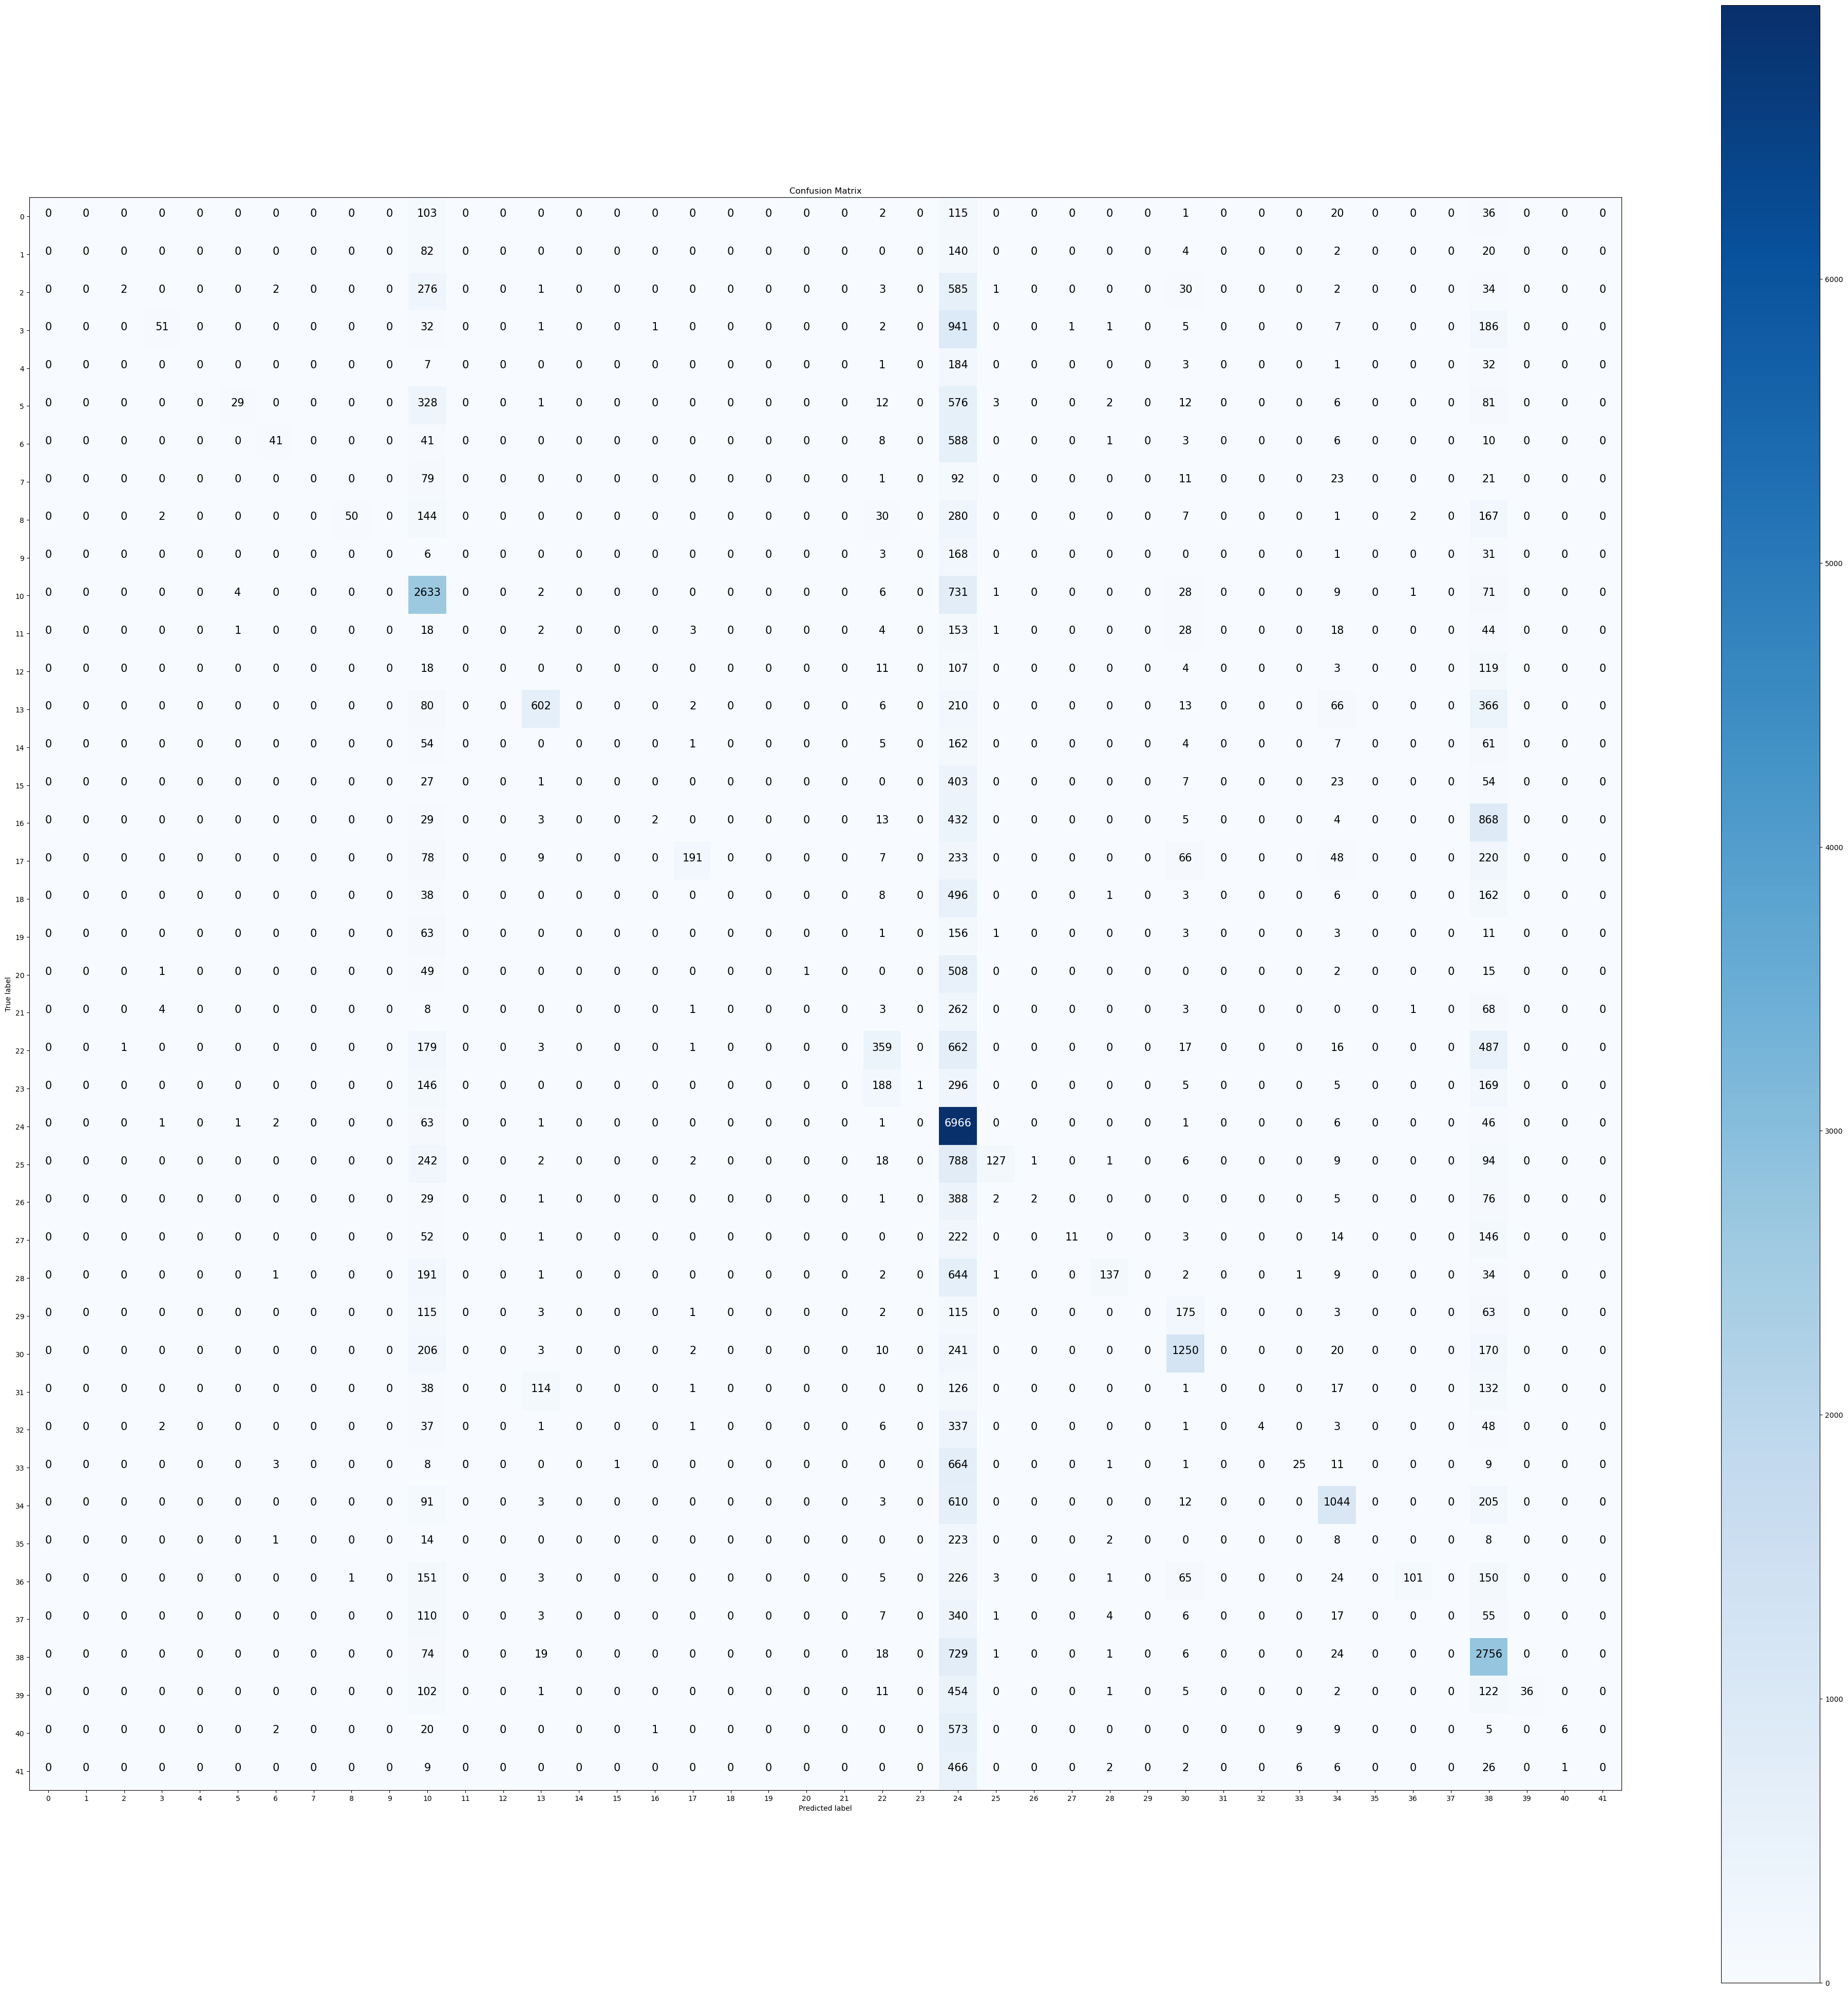

In [32]:
make_confusion_matrix(true_class, predicted_class, figsize=(50,50))

In [33]:
y_one_hot_encoded

<209527x42 sparse matrix of type '<class 'numpy.float64'>'
	with 209527 stored elements in Compressed Sparse Row format>

In [34]:
x

array(['Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters',
       'American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video',
       '23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)',
       ...,
       'Giants Over Patriots, Jets Over Colts Among  Most Improbable Super Bowl Upsets Of All Time (VIDEOS)',
       'Aldon Smith Arrested: 49ers Linebacker Busted For DUI',
       'Dwight Howard Rips Teammates After Magic Loss To Hornets'],
      dtype=object)

In [35]:
len(x), len(y_one_hot_encoded.toarray())

(209527, 209527)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y_one_hot_encoded.toarray(),
                                                   test_size=0.2,
                                                   shuffle=True)

In [37]:
len(x_train), len(x_test), len(y_train), len(y_test)

(167621, 41906, 167621, 41906)

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

In [39]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

In [40]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 42), dtype=tf.float64, name=None))>

In [41]:
max_tokens = 50000

total_sent_length = [len(sentence.split()) for sentence in x_train]
np.percentile(total_sent_length, 95), np.mean(total_sent_length), np.max(total_sent_length)

(15.0, 9.6025915607233, 44)

In [42]:
output_sequence_length = int(np.percentile(total_sent_length, 95))
output_sequence_length

15

In [43]:
text_vectorizer = layers.TextVectorization(max_tokens=max_tokens,
                                          output_sequence_length=output_sequence_length)

In [44]:
text_vectorizer.adapt(x_train)

In [45]:
text_vectorizer([x_train[0]])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  80,   34,    1,   63,   92,    3,   90,   22,    2, 1166,    8,
          26,   29, 1162,    6]], dtype=int64)>

In [46]:
embedding_layer = layers.Embedding(input_dim=max_tokens,
                                  output_dim=128)

In [47]:
len(one_hot_encoder.categories_[0])

42

In [48]:
# Desigining basic bi-lstm model

inputs = layers.Input(shape=(1, ), dtype="string")
vectorization_layer = text_vectorizer(inputs)
embedding = embedding_layer(vectorization_layer)
bi_lstm_layer = layers.Bidirectional(layers.LSTM(64))(embedding)
dropout_layer = layers.Dropout(0.5)(bi_lstm_layer)
outputs = layers.Dense(len(one_hot_encoder.categories_[0]), activation="softmax")(dropout_layer)
model_1 = tf.keras.models.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [49]:
history_1 = model_1.fit(train_dataset,
                       validation_data=test_dataset,
                       epochs=3)

Epoch 1/3
5239/5239 [==============================] - 481s 91ms/step - loss: 2.0671 - accuracy: 0.4674 - val_loss: 1.6189 - val_accuracy: 0.5600
Epoch 2/3
5239/5239 [==============================] - 502s 96ms/step - loss: 1.4146 - accuracy: 0.6079 - val_loss: 1.5372 - val_accuracy: 0.5835
Epoch 3/3
5239/5239 [==============================] - 692s 132ms/step - loss: 1.1358 - accuracy: 0.6796 - val_loss: 1.6079 - val_accuracy: 0.5782


In [50]:
model_1_score = model_1.evaluate(test_dataset)
model_1_score = model_1_score[1]
model_1_score

1310/1310 [==============================] - 16s 12ms/step - loss: 1.6079 - accuracy: 0.5782


0.5781511068344116

In [51]:
output_shape = len(one_hot_encoder.categories_[0])
output_shape

42

In [52]:
# Model 2 implementing simple lstm model

inputs = layers.Input(shape=(1, ), dtype="string")
vectorizer_layer = text_vectorizer(inputs)
embedding_layer = layers.Embedding(input_dim=max_tokens, output_dim=128)(vectorizer_layer)
lstm_layer = layers.LSTM(64)(embedding_layer)
dropout_layer = layers.Dropout(0.5)(lstm_layer)
outputs = layers.Dense(output_shape, activation="softmax")(dropout_layer)
model_2 = tf.keras.models.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [53]:
history_2 = model_2.fit(train_dataset,
                       validation_data=test_dataset,
                       epochs=3)

Epoch 1/3
5239/5239 [==============================] - 604s 114ms/step - loss: 2.2817 - accuracy: 0.4208 - val_loss: 1.7996 - val_accuracy: 0.5252
Epoch 2/3
5239/5239 [==============================] - 1079s 206ms/step - loss: 1.6133 - accuracy: 0.5713 - val_loss: 1.6311 - val_accuracy: 0.5647
Epoch 3/3
5239/5239 [==============================] - 495s 95ms/step - loss: 1.3156 - accuracy: 0.6386 - val_loss: 1.6542 - val_accuracy: 0.5672


In [54]:
model_2_score = model_2.evaluate(test_dataset)
model_2_score = model_2_score[1]
model_2_score

1310/1310 [==============================] - 8s 6ms/step - loss: 1.6542 - accuracy: 0.5672


0.5672457218170166

In [ ]:
def create_summary(model, x_test, y_test, classes):

    prediction_prob = model.predict(x_test)
    y_pred = tf.argmax(prediction_prob, axis=1)

    y_true = tf.argmax(y_test, axis=1)

    y_pred = [classes[single_value] for single_value in y_pred]
    y_true = [classes[single_value] for single_value in y_true]

    new_df = df.category.value_counts().to_frame().sort_index()
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    classified_report = pd.concat([pd.DataFrame.from_dict(report_dict).transpose(), new_df], axis=1)

    make_confusion_matrix(y_true, y_pred, figsize=(50,50))

    return classified_report


In [ ]:
classes = one_hot_encoder.categories_[0]
classes

1310/1310 [==============================] - 10s 7ms/step


,precision,recall,f1-score,support,count
ARTS,0.246809,0.207885,0.225681,279.000000,1509.0
ARTS & CULTURE,0.283505,0.206767,0.239130,266.000000,1339.0
BLACK VOICES,0.500709,0.387912,0.437152,910.000000,4583.0
BUSINESS,0.487782,0.446260,0.466098,1163.000000,5992.0
COLLEGE,0.484663,0.367442,0.417989,215.000000,1144.0
COMEDY,0.468921,0.476323,0.472593,1077.000000,5400.0
CRIME,0.467762,0.549777,0.505464,673.000000,3562.0
CULTURE & ARTS,0.596899,0.339207,0.432584,227.000000,1074.0
DIVORCE,0.666220,0.719247,0.691719,691.000000,3426.0
EDUCATION,0.458824,0.198980,0.277580,196.000000,1014.0


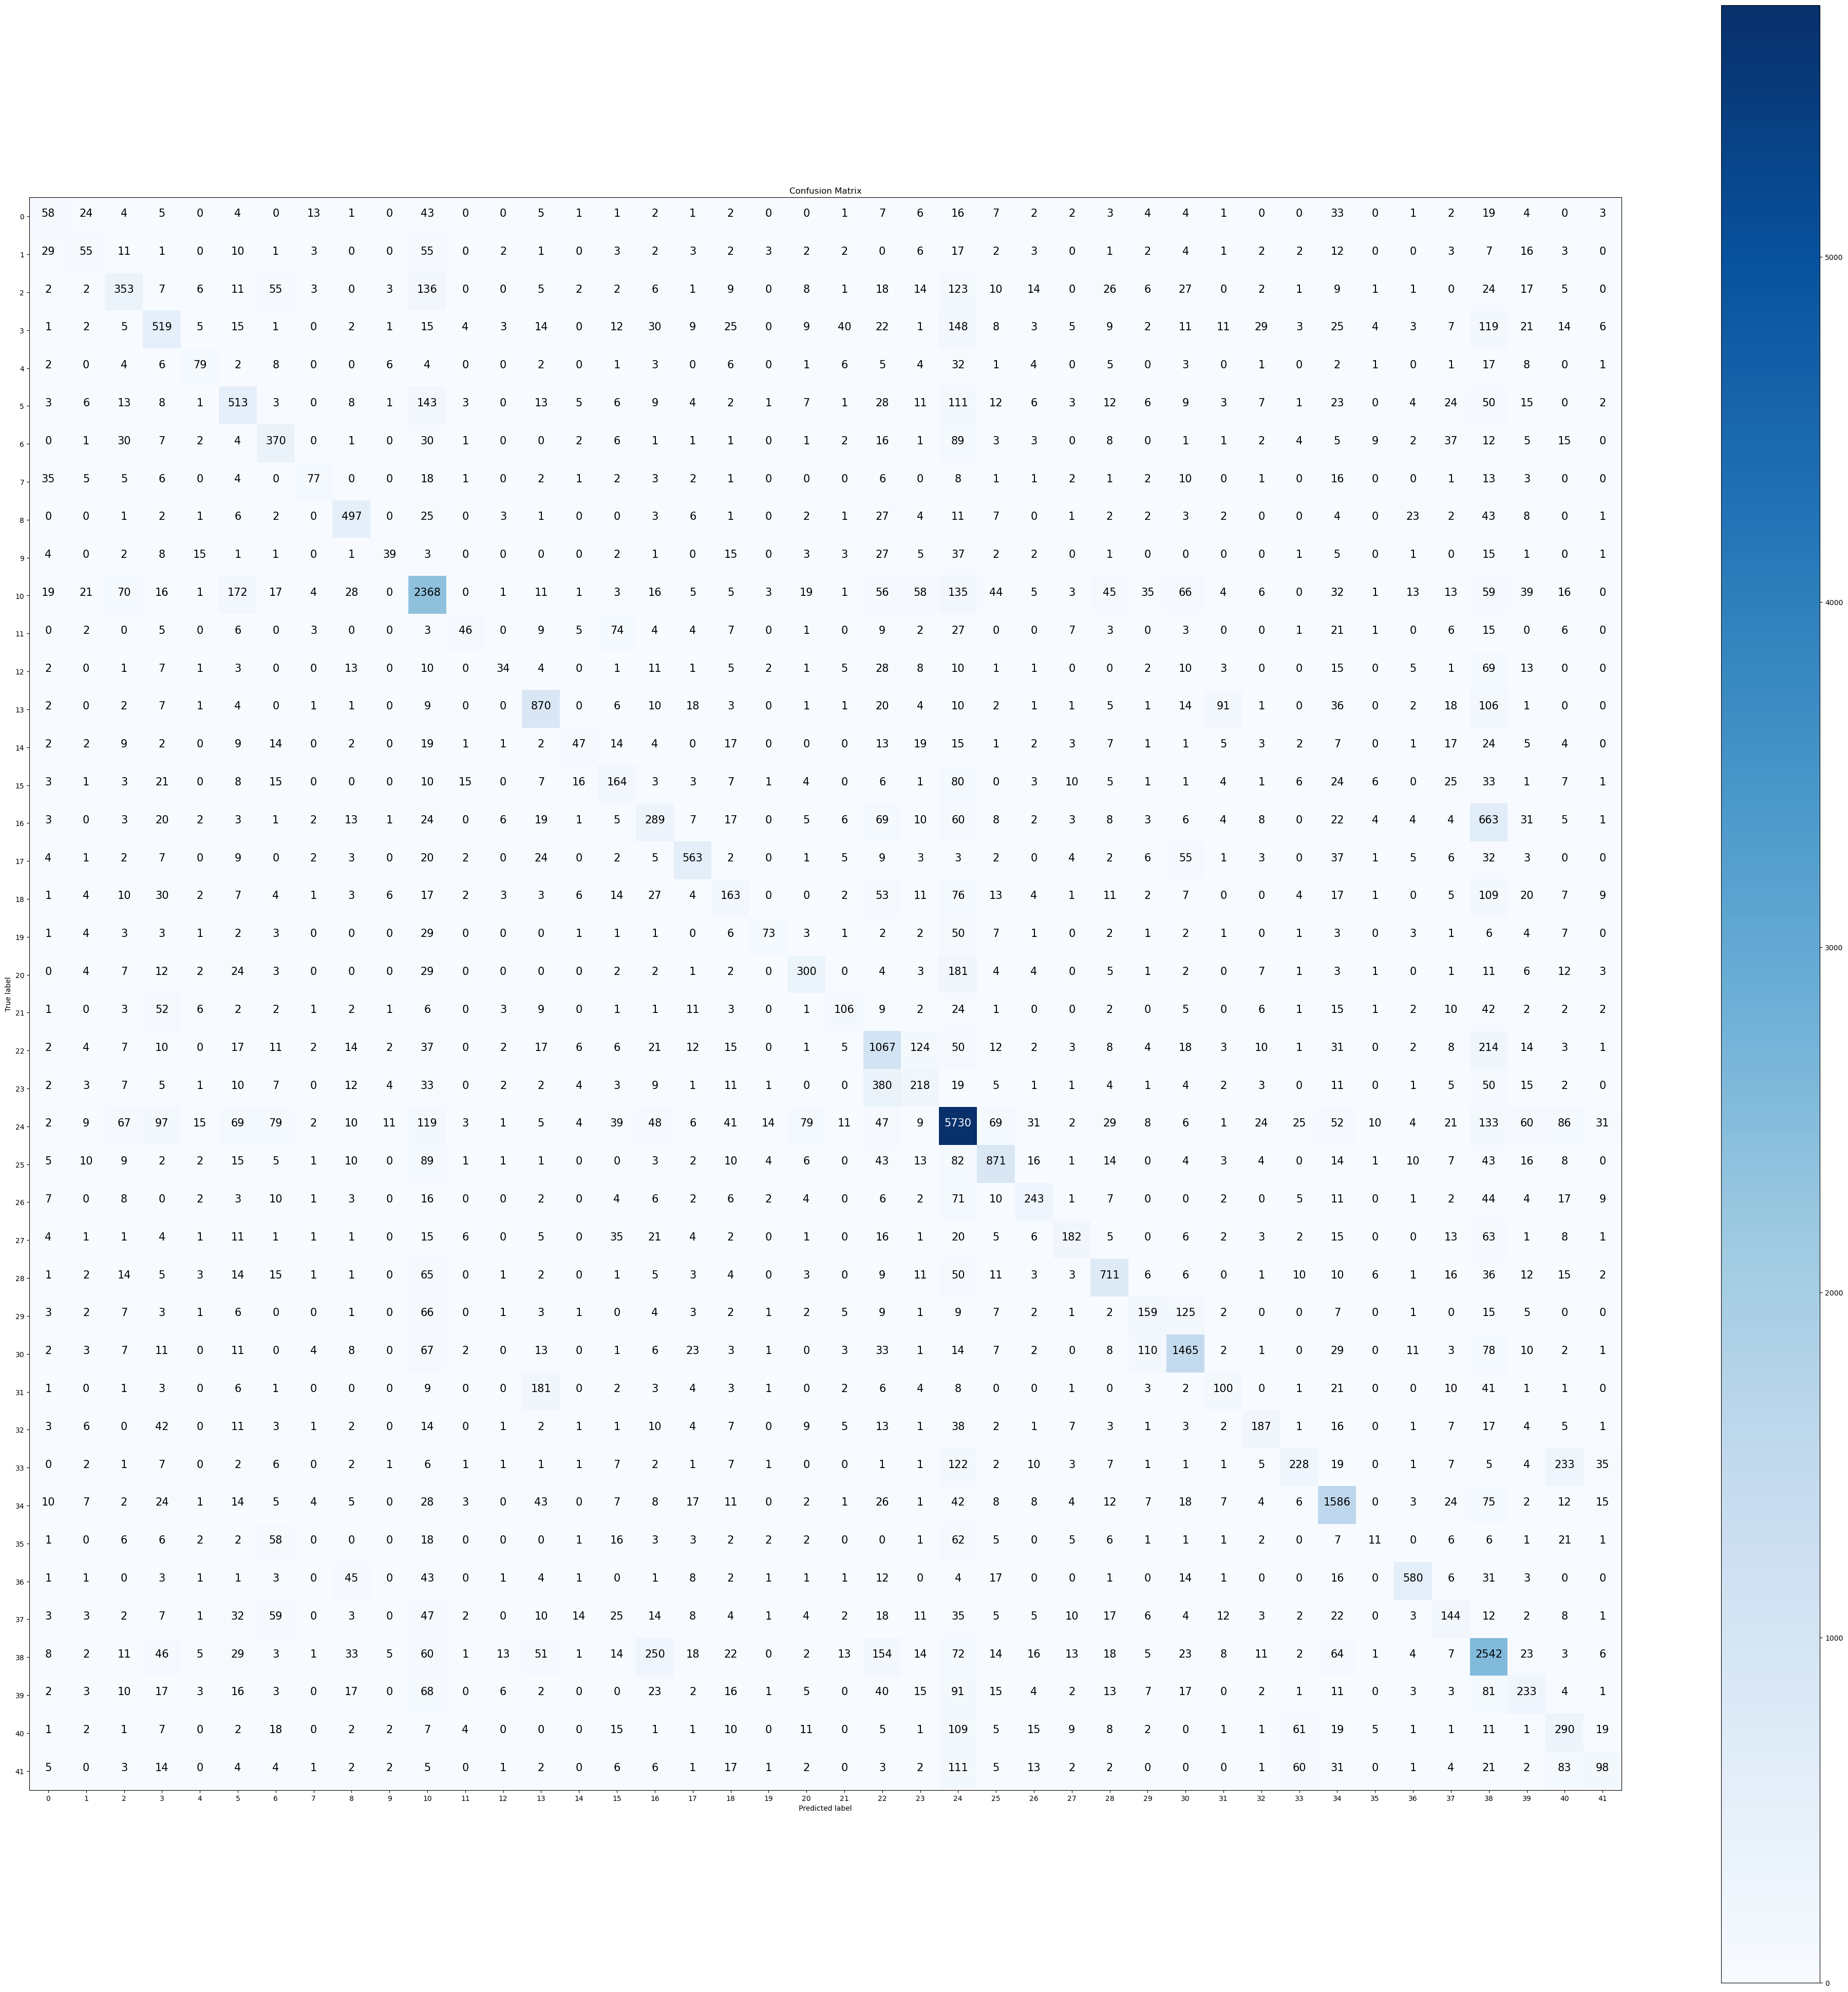

In [57]:
create_summary(model_1, x_test, y_test, classes)

1310/1310 [==============================] - 9s 6ms/step


,precision,recall,f1-score,support,count
ARTS,0.267490,0.232975,0.249042,279.000000,1509.0
ARTS & CULTURE,0.261905,0.165414,0.202765,266.000000,1339.0
BLACK VOICES,0.540541,0.351648,0.426099,910.000000,4583.0
BUSINESS,0.440068,0.441960,0.441012,1163.000000,5992.0
COLLEGE,0.487013,0.348837,0.406504,215.000000,1144.0
COMEDY,0.512644,0.414113,0.458141,1077.000000,5400.0
CRIME,0.492221,0.517088,0.504348,673.000000,3562.0
CULTURE & ARTS,0.528169,0.330396,0.406504,227.000000,1074.0
DIVORCE,0.653955,0.670043,0.661901,691.000000,3426.0
EDUCATION,0.417722,0.168367,0.240000,196.000000,1014.0


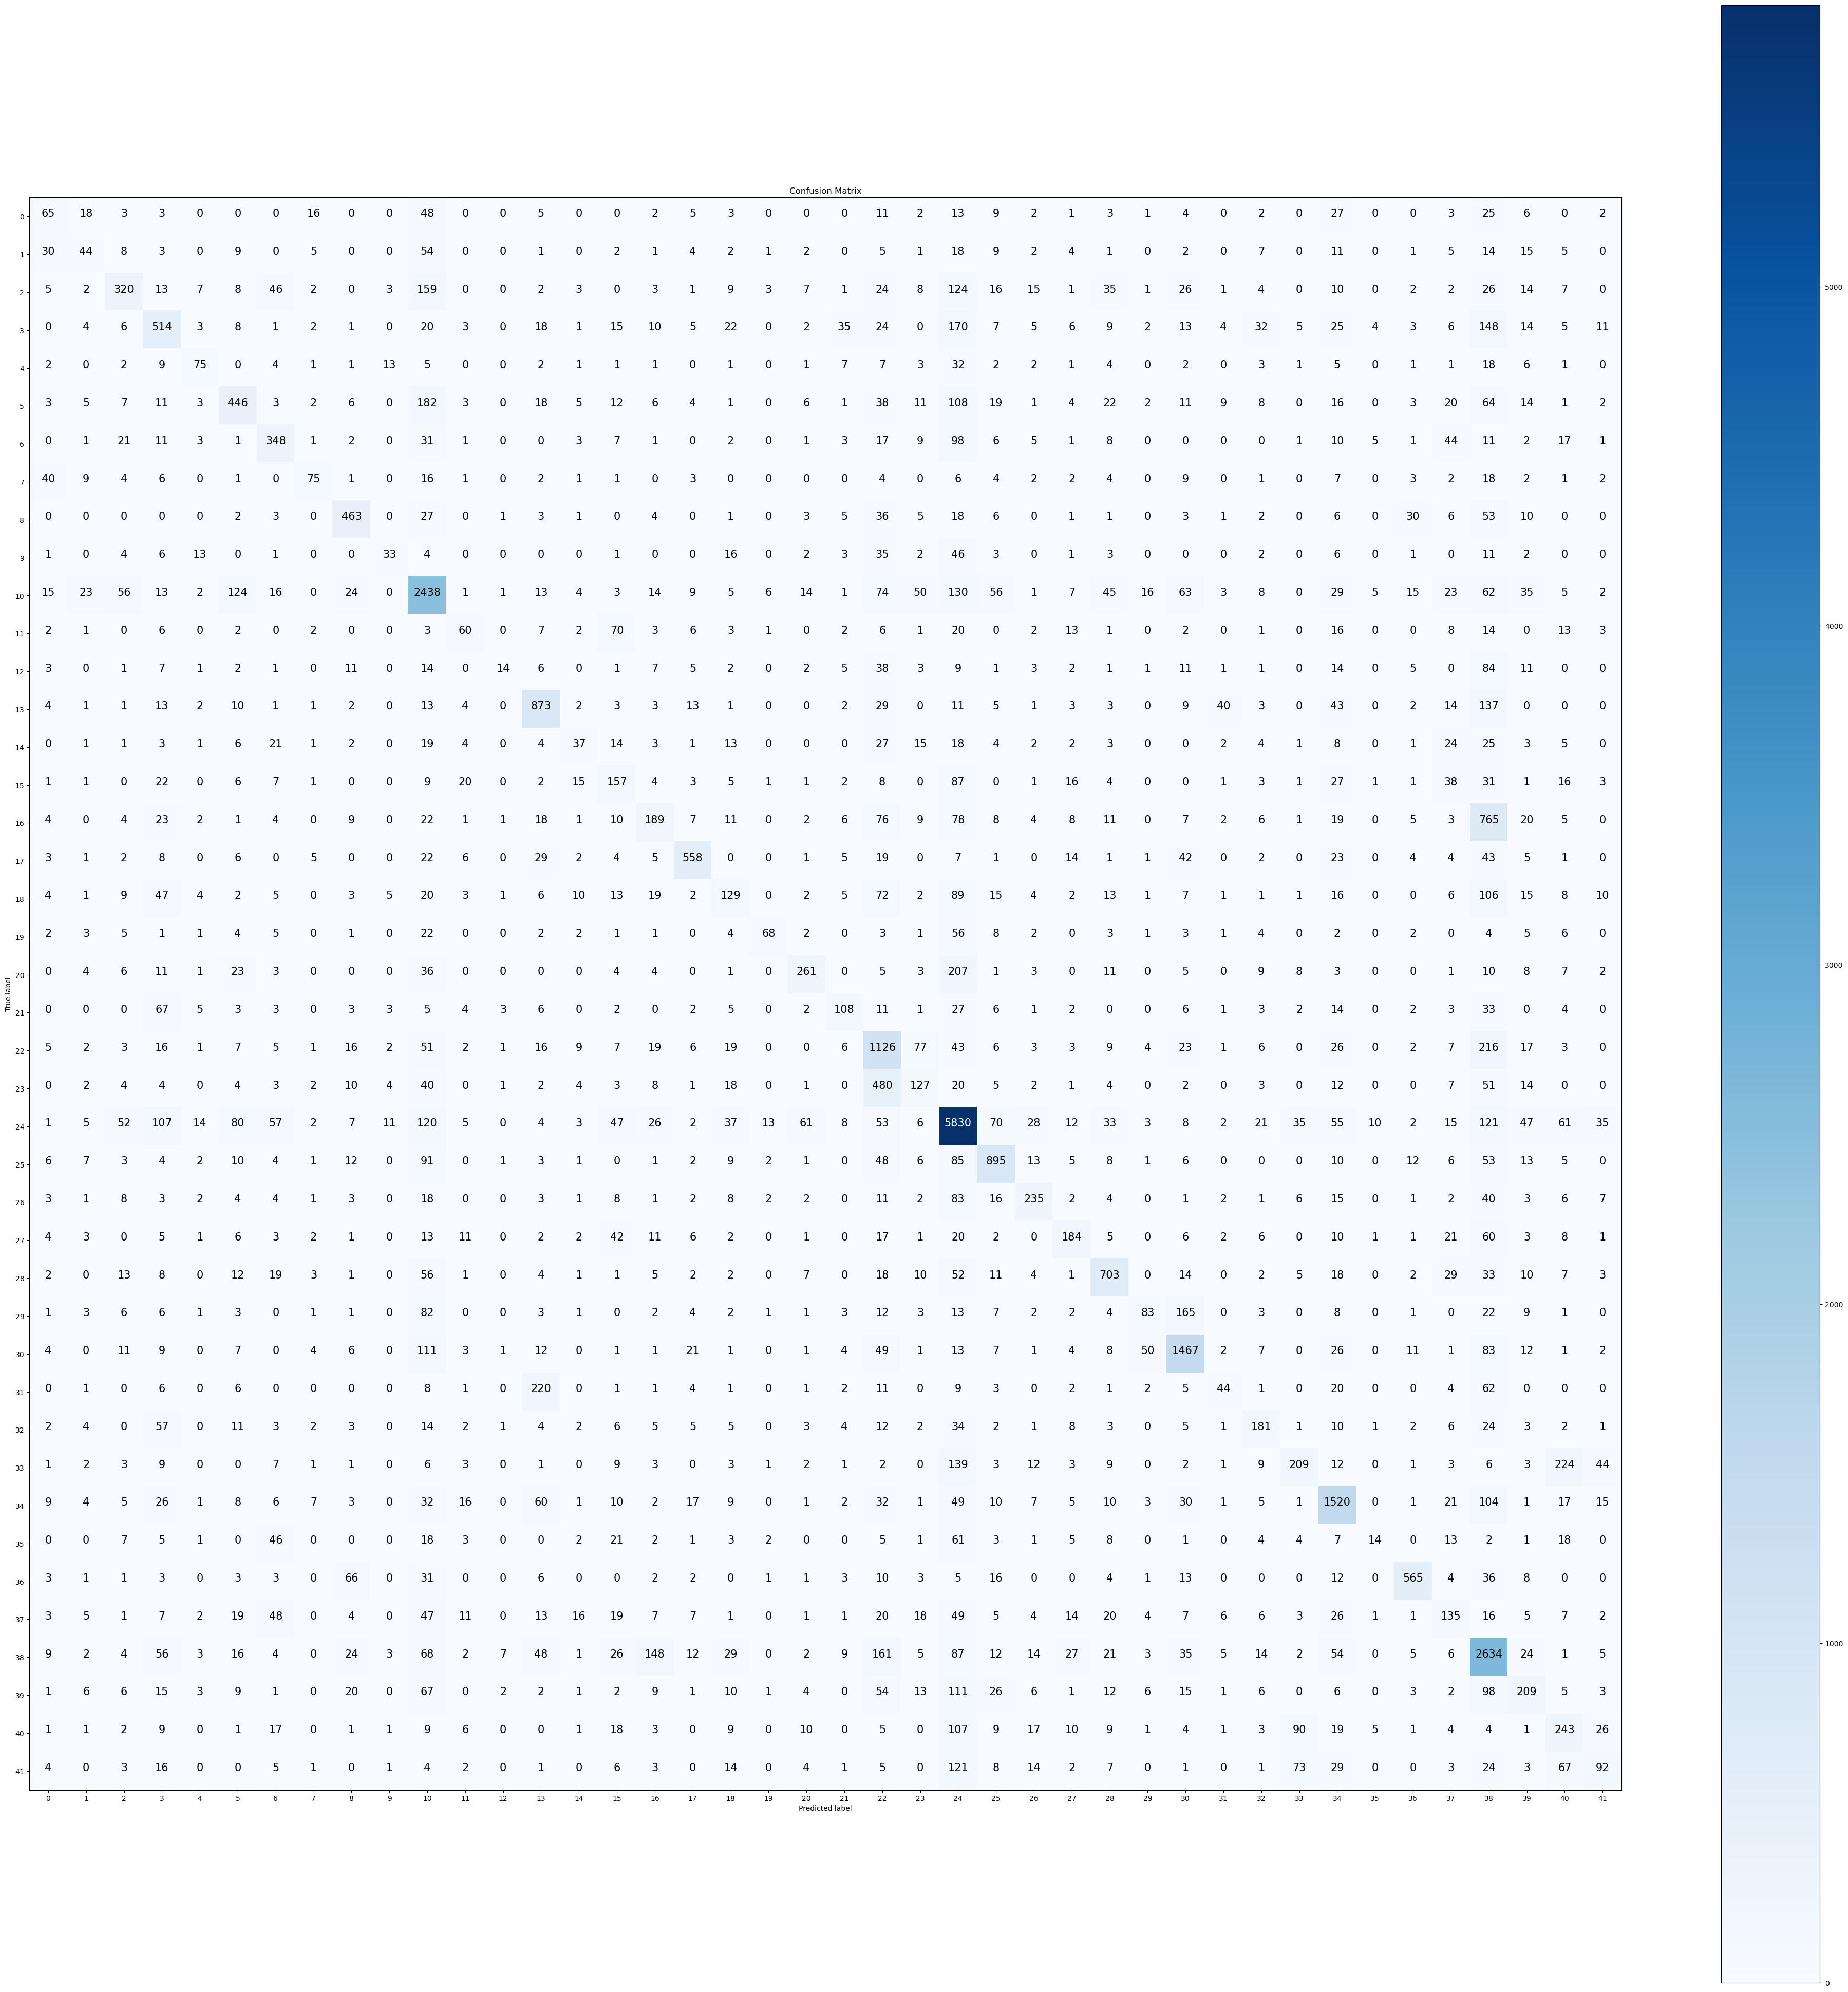

In [58]:
create_summary(model_2, x_test, y_test, classes)

Epoch 1/3
5239/5239 [==============================] - 552s 104ms/step - loss: 2.2188 - accuracy: 0.4281 - val_loss: 1.7896 - val_accuracy: 0.5252
Epoch 2/3
5239/5239 [==============================] - 530s 101ms/step - loss: 1.5242 - accuracy: 0.5835 - val_loss: 1.6419 - val_accuracy: 0.5605
Epoch 3/3
1310/1310 [==============================] - 12s 9ms/step - loss: 1.6968 - accuracy: 0.5602
0.5601823329925537
1310/1310 [==============================] - 14s 10ms/step


,precision,recall,f1-score,support,count
ARTS,0.250000,0.215054,0.231214,279.000000,1509.0
ARTS & CULTURE,0.263393,0.221805,0.240816,266.000000,1339.0
BLACK VOICES,0.489731,0.340659,0.401815,910.000000,4583.0
BUSINESS,0.432749,0.445400,0.438983,1163.000000,5992.0
COLLEGE,0.458065,0.330233,0.383784,215.000000,1144.0
COMEDY,0.542476,0.415042,0.470279,1077.000000,5400.0
CRIME,0.477115,0.511144,0.493544,673.000000,3562.0
CULTURE & ARTS,0.532258,0.290749,0.376068,227.000000,1074.0
DIVORCE,0.678466,0.665702,0.672023,691.000000,3426.0
EDUCATION,0.415842,0.214286,0.282828,196.000000,1014.0


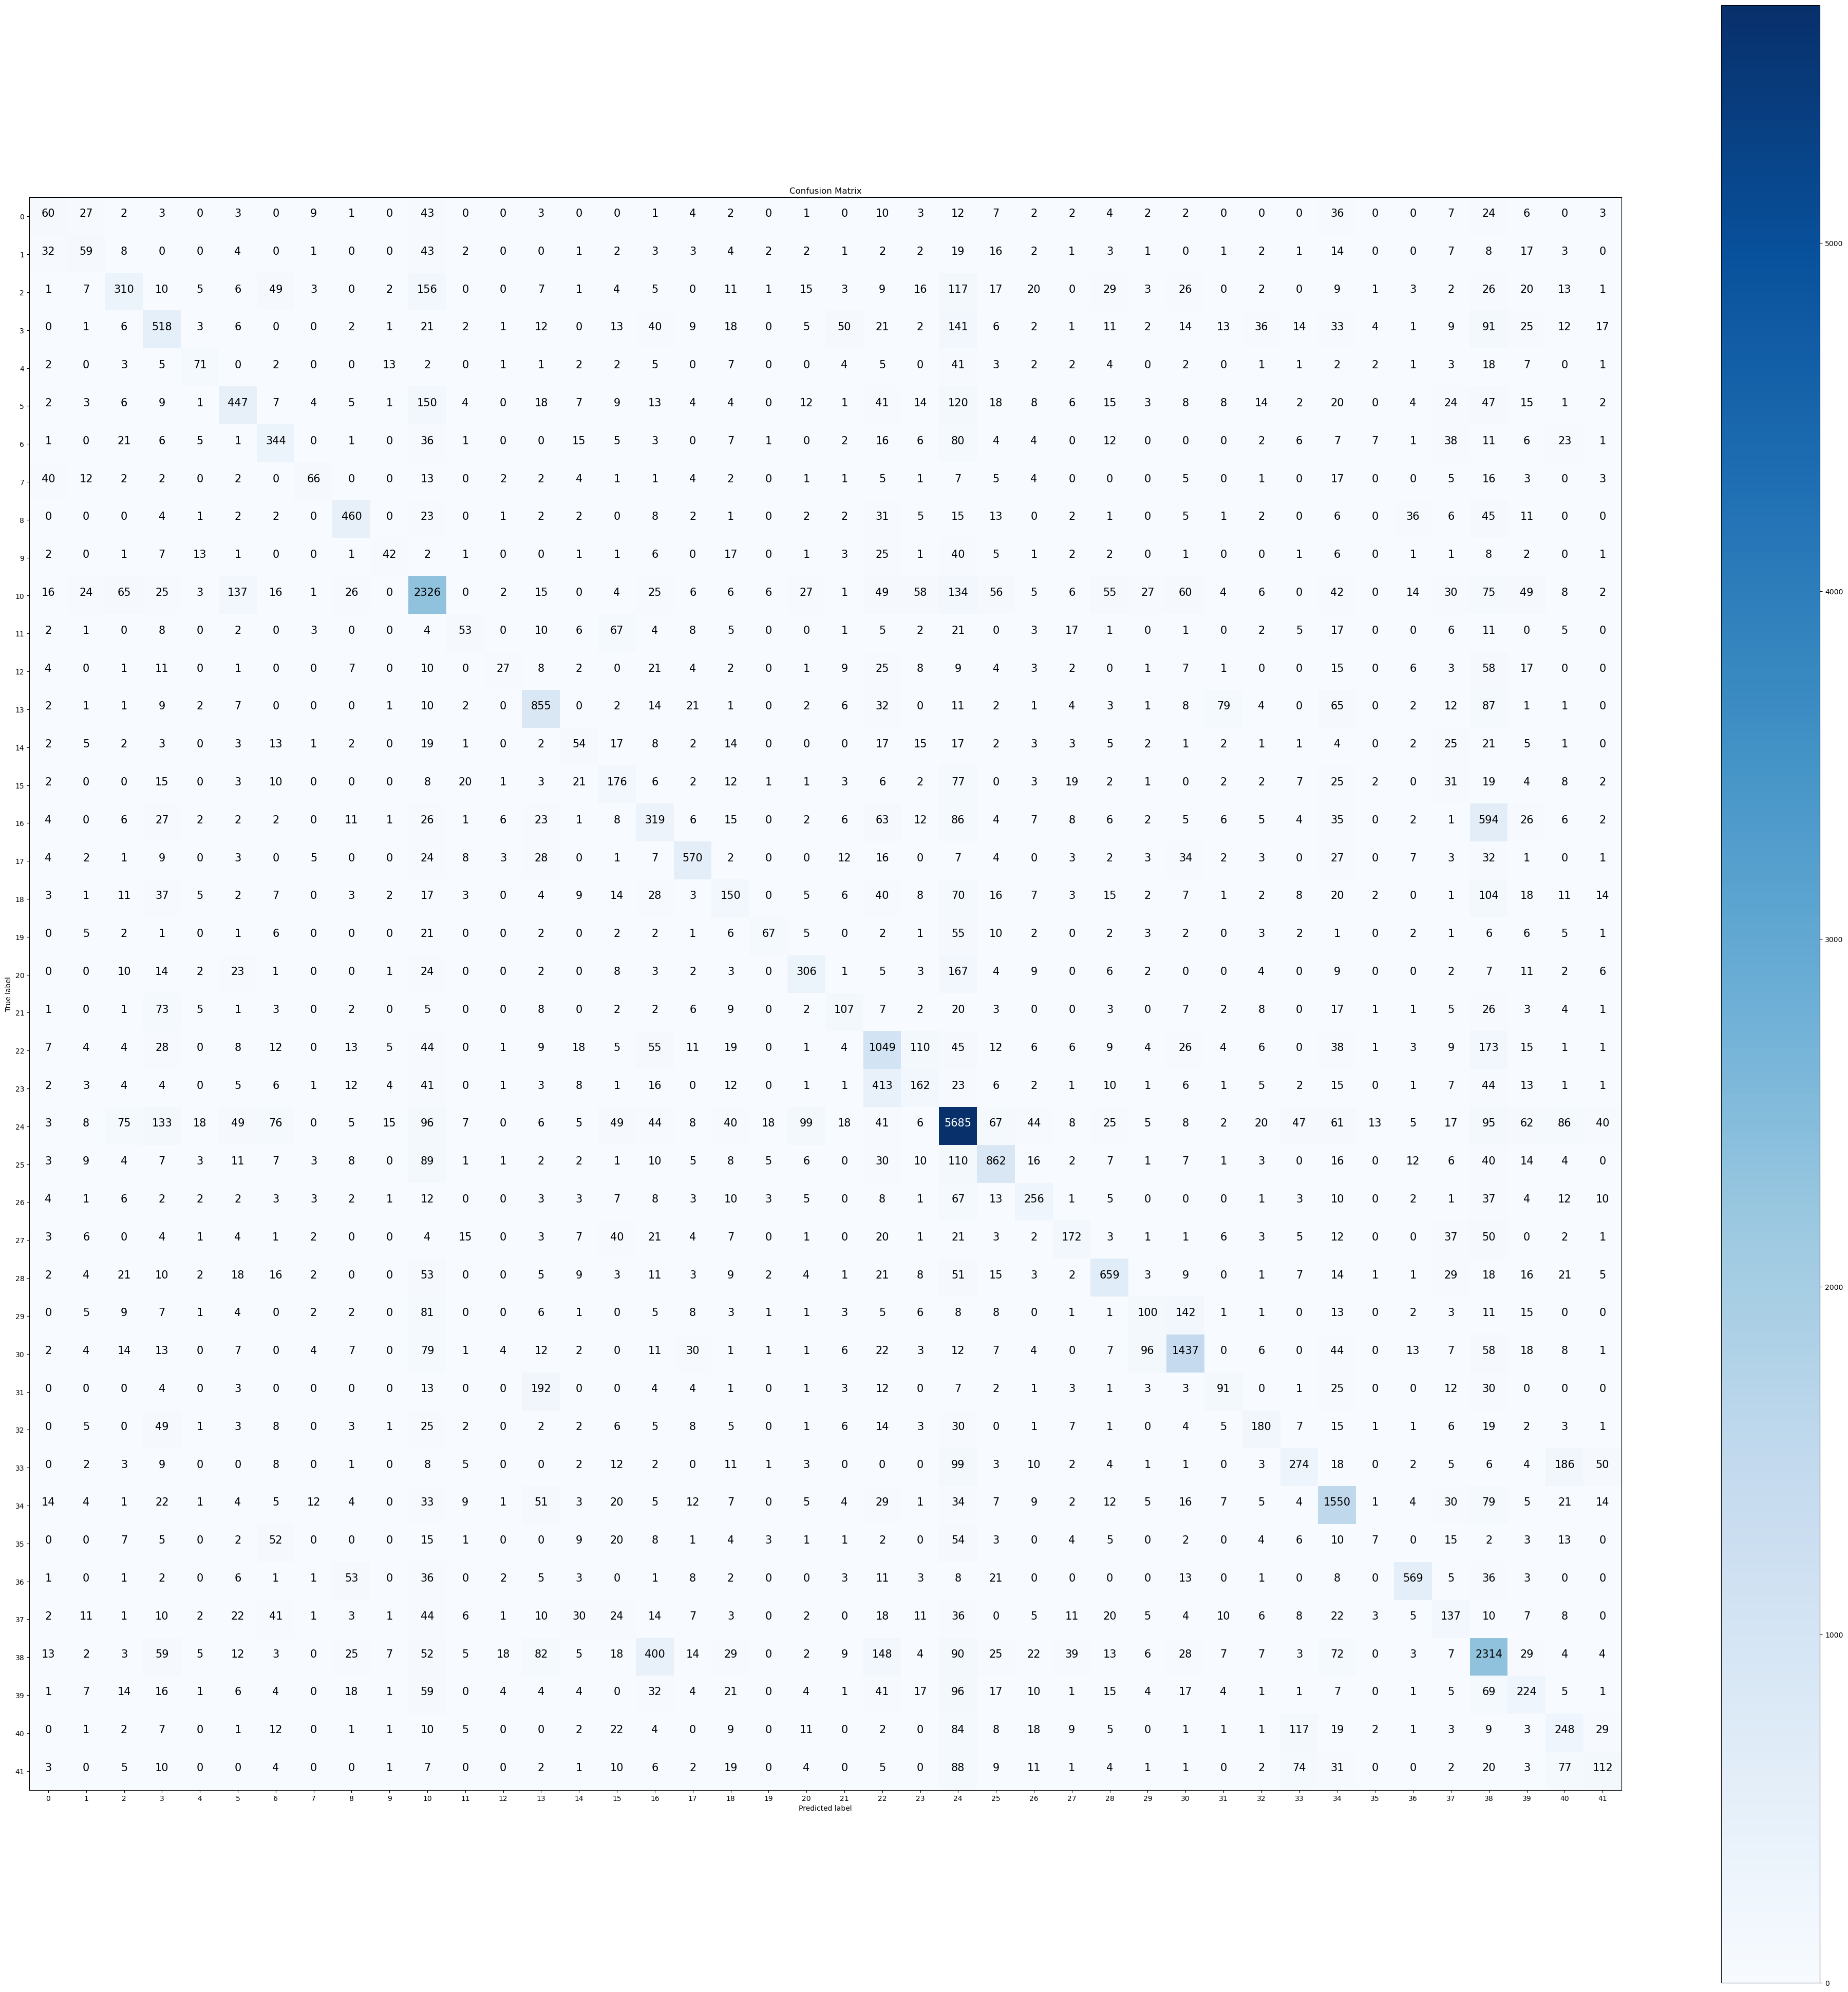

In [59]:
# Model 3 : stacked lstm model

inputs = layers.Input(shape=(1, ), dtype="string")
vectorizer_layer = text_vectorizer(inputs)
embedding_layer = layers.Embedding(input_dim=max_tokens, output_dim=128)(vectorizer_layer)
lstm_layer = layers.LSTM(64, return_sequences=True)(embedding_layer)
dropout_layer = layers.Dropout(0.5)(lstm_layer)
lstm_layer_2 = layers.LSTM(32)(dropout_layer)
outputs = layers.Dense(output_shape, activation="softmax")(lstm_layer_2)
model_3 = tf.keras.models.Model(inputs, outputs)

model_3.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_3 = model_3.fit(train_dataset,
                       validation_data=test_dataset,
                       epochs=3)

model_3_score = model_3.evaluate(test_dataset)
model_3_score = model_3_score[1]
print(model_3_score)

create_summary(model_3, x_test, y_test, classes)

Epoch 1/3
5239/5239 [==============================] - 638s 120ms/step - loss: 2.0619 - accuracy: 0.4633 - val_loss: 1.6628 - val_accuracy: 0.5498
Epoch 2/3
5239/5239 [==============================] - 603s 115ms/step - loss: 1.3940 - accuracy: 0.6118 - val_loss: 1.5929 - val_accuracy: 0.5709
Epoch 3/3
1310/1310 [==============================] - 17s 13ms/step - loss: 1.6932 - accuracy: 0.5667
0.5667207837104797
1310/1310 [==============================] - 23s 15ms/step


,precision,recall,f1-score,support,count
ARTS,0.192105,0.261649,0.221548,279.000000,1509.0
ARTS & CULTURE,0.237410,0.248120,0.242647,266.000000,1339.0
BLACK VOICES,0.492264,0.384615,0.431832,910.000000,4583.0
BUSINESS,0.466725,0.458298,0.462473,1163.000000,5992.0
COLLEGE,0.517241,0.348837,0.416667,215.000000,1144.0
COMEDY,0.489510,0.454968,0.471607,1077.000000,5400.0
CRIME,0.446043,0.552749,0.493696,673.000000,3562.0
CULTURE & ARTS,0.666667,0.255507,0.369427,227.000000,1074.0
DIVORCE,0.605804,0.725036,0.660079,691.000000,3426.0
EDUCATION,0.470588,0.244898,0.322148,196.000000,1014.0


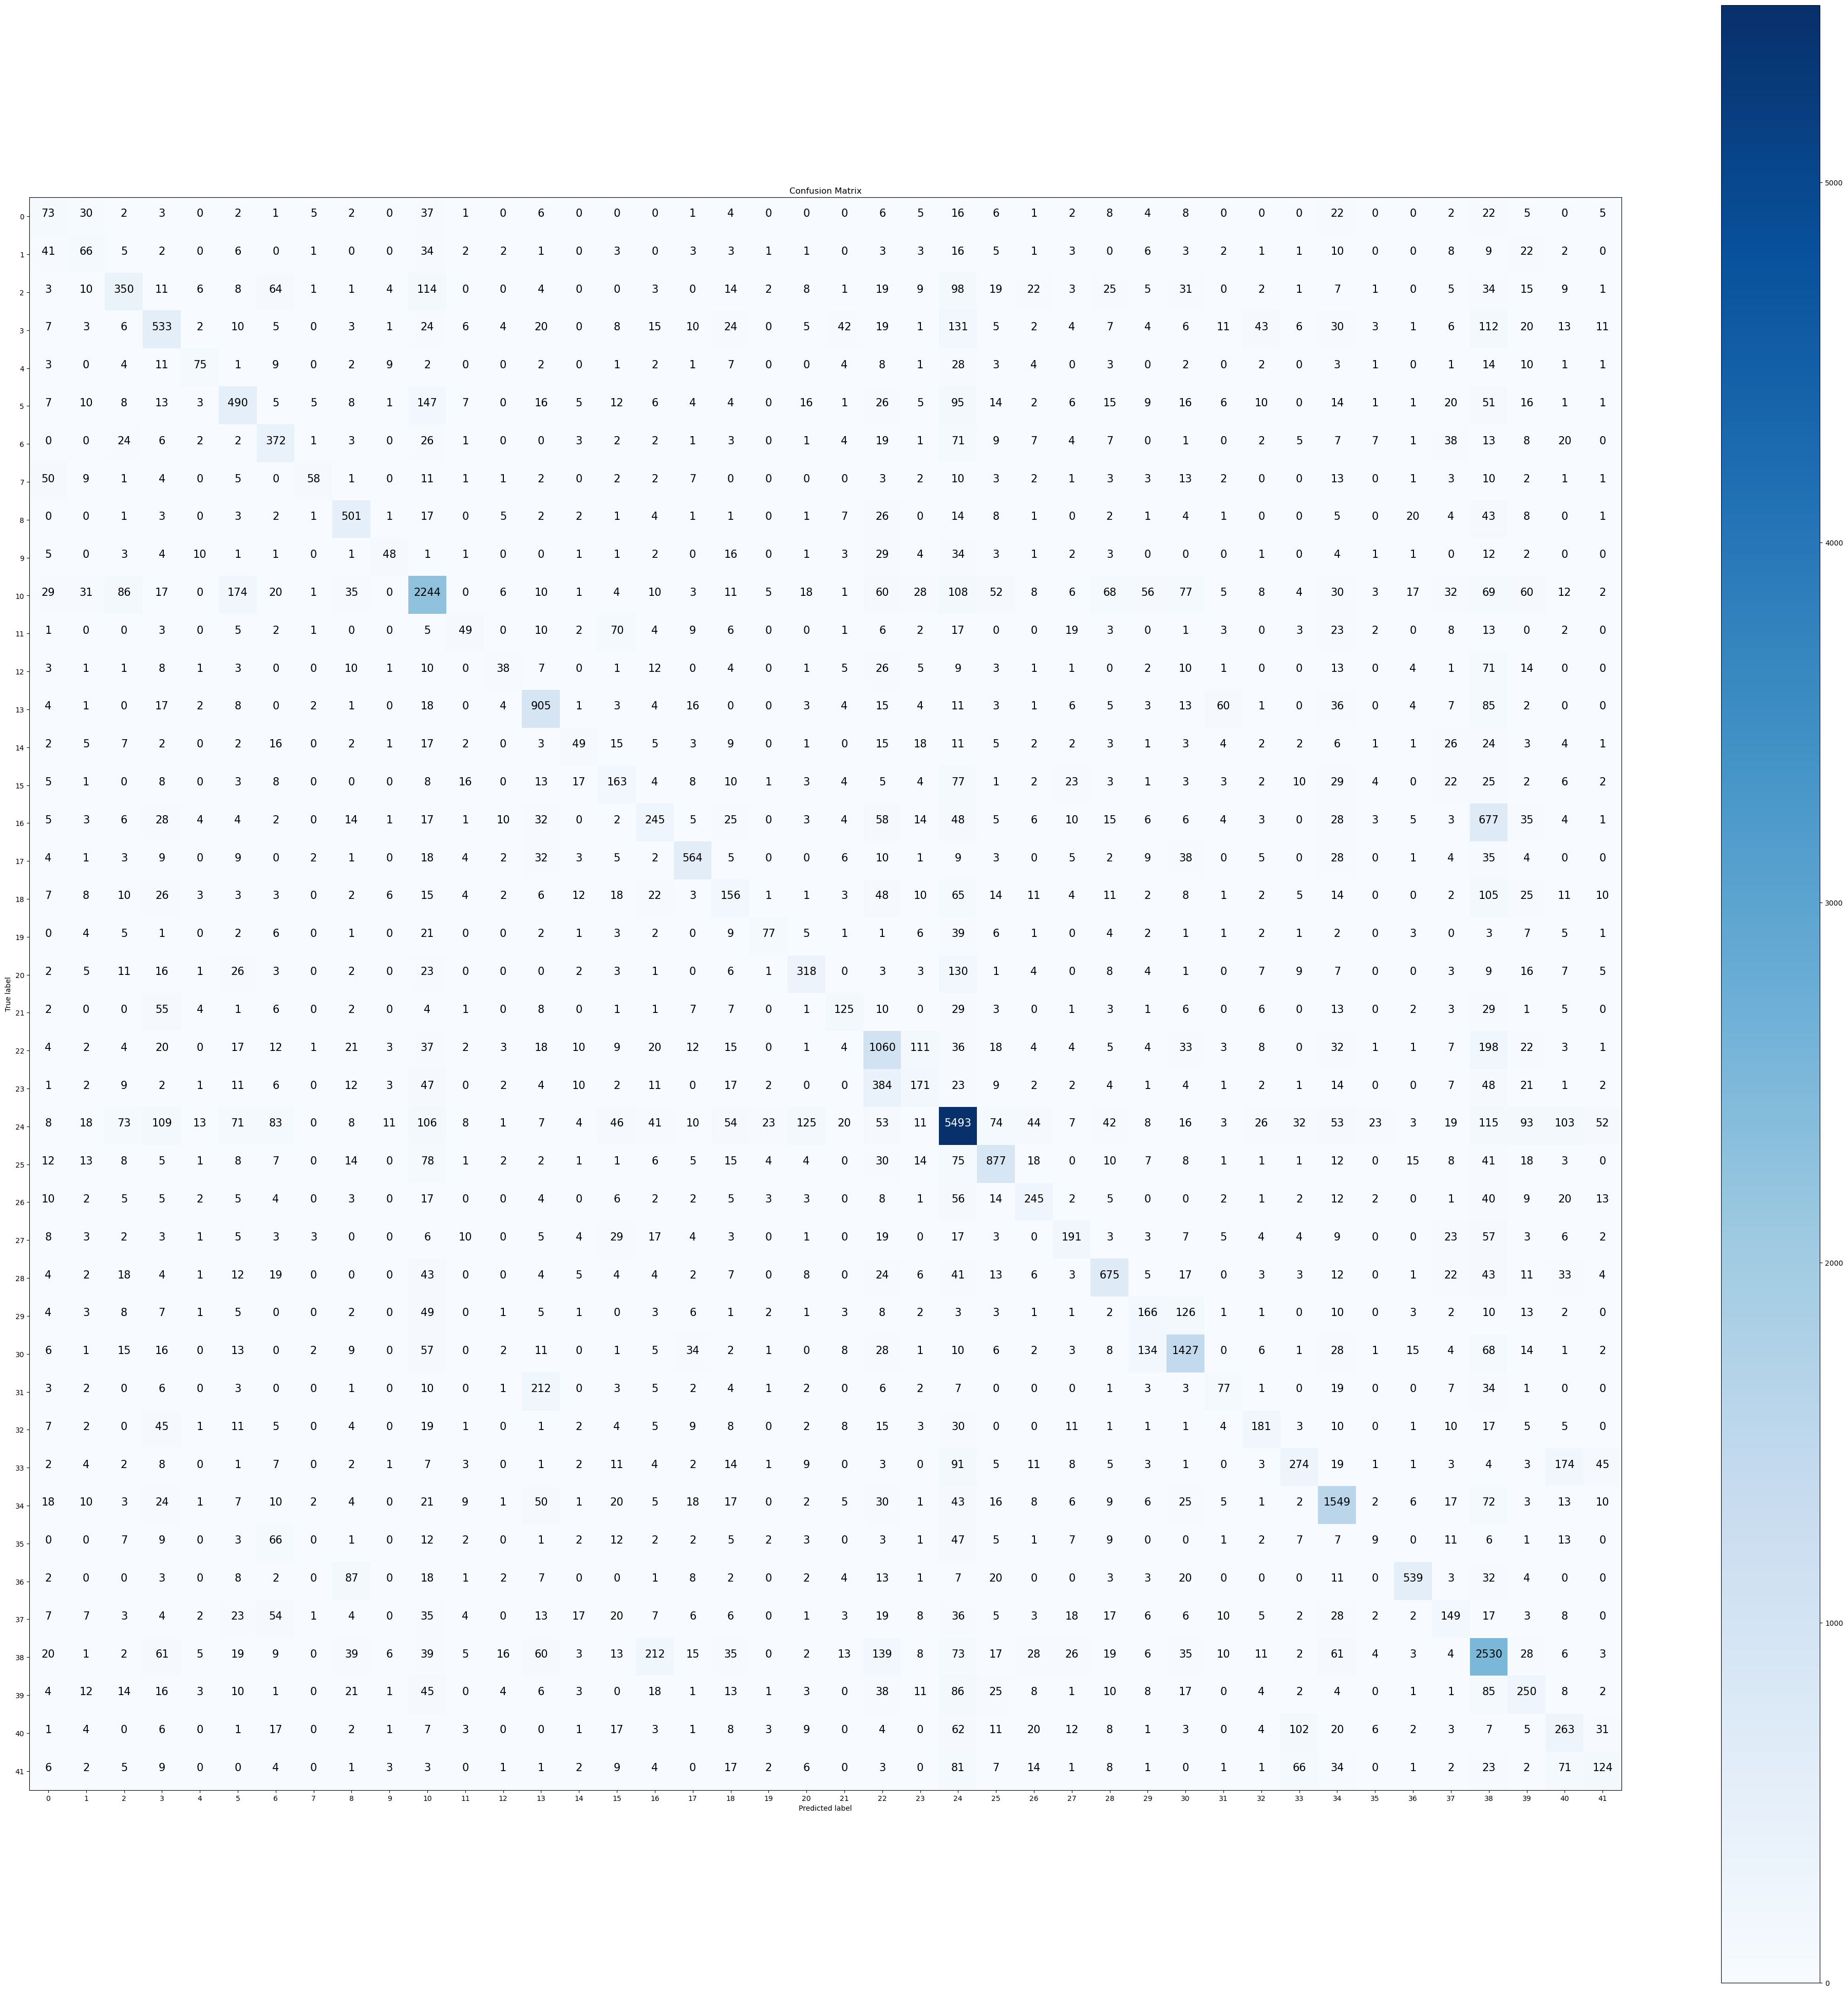

In [60]:
# Model 4 : stacked bi-lstm model

inputs = layers.Input(shape=(1, ), dtype="string")
vectorizer_layer = text_vectorizer(inputs)
embedding_layer = layers.Embedding(input_dim=max_tokens, output_dim=128)(vectorizer_layer)
lstm_layer = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(embedding_layer)
dropout_layer = layers.Dropout(0.5)(lstm_layer)
lstm_layer_2 = layers.Bidirectional(layers.LSTM(32))(dropout_layer)
outputs = layers.Dense(output_shape, activation="softmax")(lstm_layer_2)
model_4 = tf.keras.models.Model(inputs, outputs)

model_4.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_4 = model_4.fit(train_dataset,
                       validation_data=test_dataset,
                       epochs=3)

model_4_score = model_4.evaluate(test_dataset)
model_4_score = model_4_score[1]
print(model_4_score)

create_summary(model_4, x_test, y_test, classes)

In [62]:
pip install tensorflow_hub

  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/6e/1a/fbae76f4057b9bcdf9468025d7a8ca952dec14bfafb9fc0b1e4244ce212f/tensorflow_hub-0.15.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/85.4 kB ? eta -:--:--
   ------------------- -------------------- 41.0/85.4 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 85.4/85.4 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [63]:
import tensorflow_hub as hub

layer_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

Epoch 1/3
5239/5239 [==============================] - 55s 10ms/step - loss: 1.6384 - accuracy: 0.5430 - val_loss: 1.4592 - val_accuracy: 0.5739
Epoch 2/3
5239/5239 [==============================] - 49s 9ms/step - loss: 1.4411 - accuracy: 0.5793 - val_loss: 1.4347 - val_accuracy: 0.5797
Epoch 3/3
1310/1310 [==============================] - 11s 8ms/step - loss: 1.4220 - accuracy: 0.5830
0.5830191373825073
1310/1310 [==============================] - 13s 9ms/step


,precision,recall,f1-score,support,count
ARTS,0.258964,0.232975,0.245283,279.000000,1509.0
ARTS & CULTURE,0.374101,0.195489,0.256790,266.000000,1339.0
BLACK VOICES,0.524085,0.298901,0.380686,910.000000,4583.0
BUSINESS,0.493827,0.447120,0.469314,1163.000000,5992.0
COLLEGE,0.461078,0.358140,0.403141,215.000000,1144.0
COMEDY,0.552395,0.342618,0.422923,1077.000000,5400.0
CRIME,0.500647,0.575037,0.535270,673.000000,3562.0
CULTURE & ARTS,0.565217,0.171806,0.263514,227.000000,1074.0
DIVORCE,0.646492,0.680174,0.662906,691.000000,3426.0
EDUCATION,0.482759,0.214286,0.296820,196.000000,1014.0


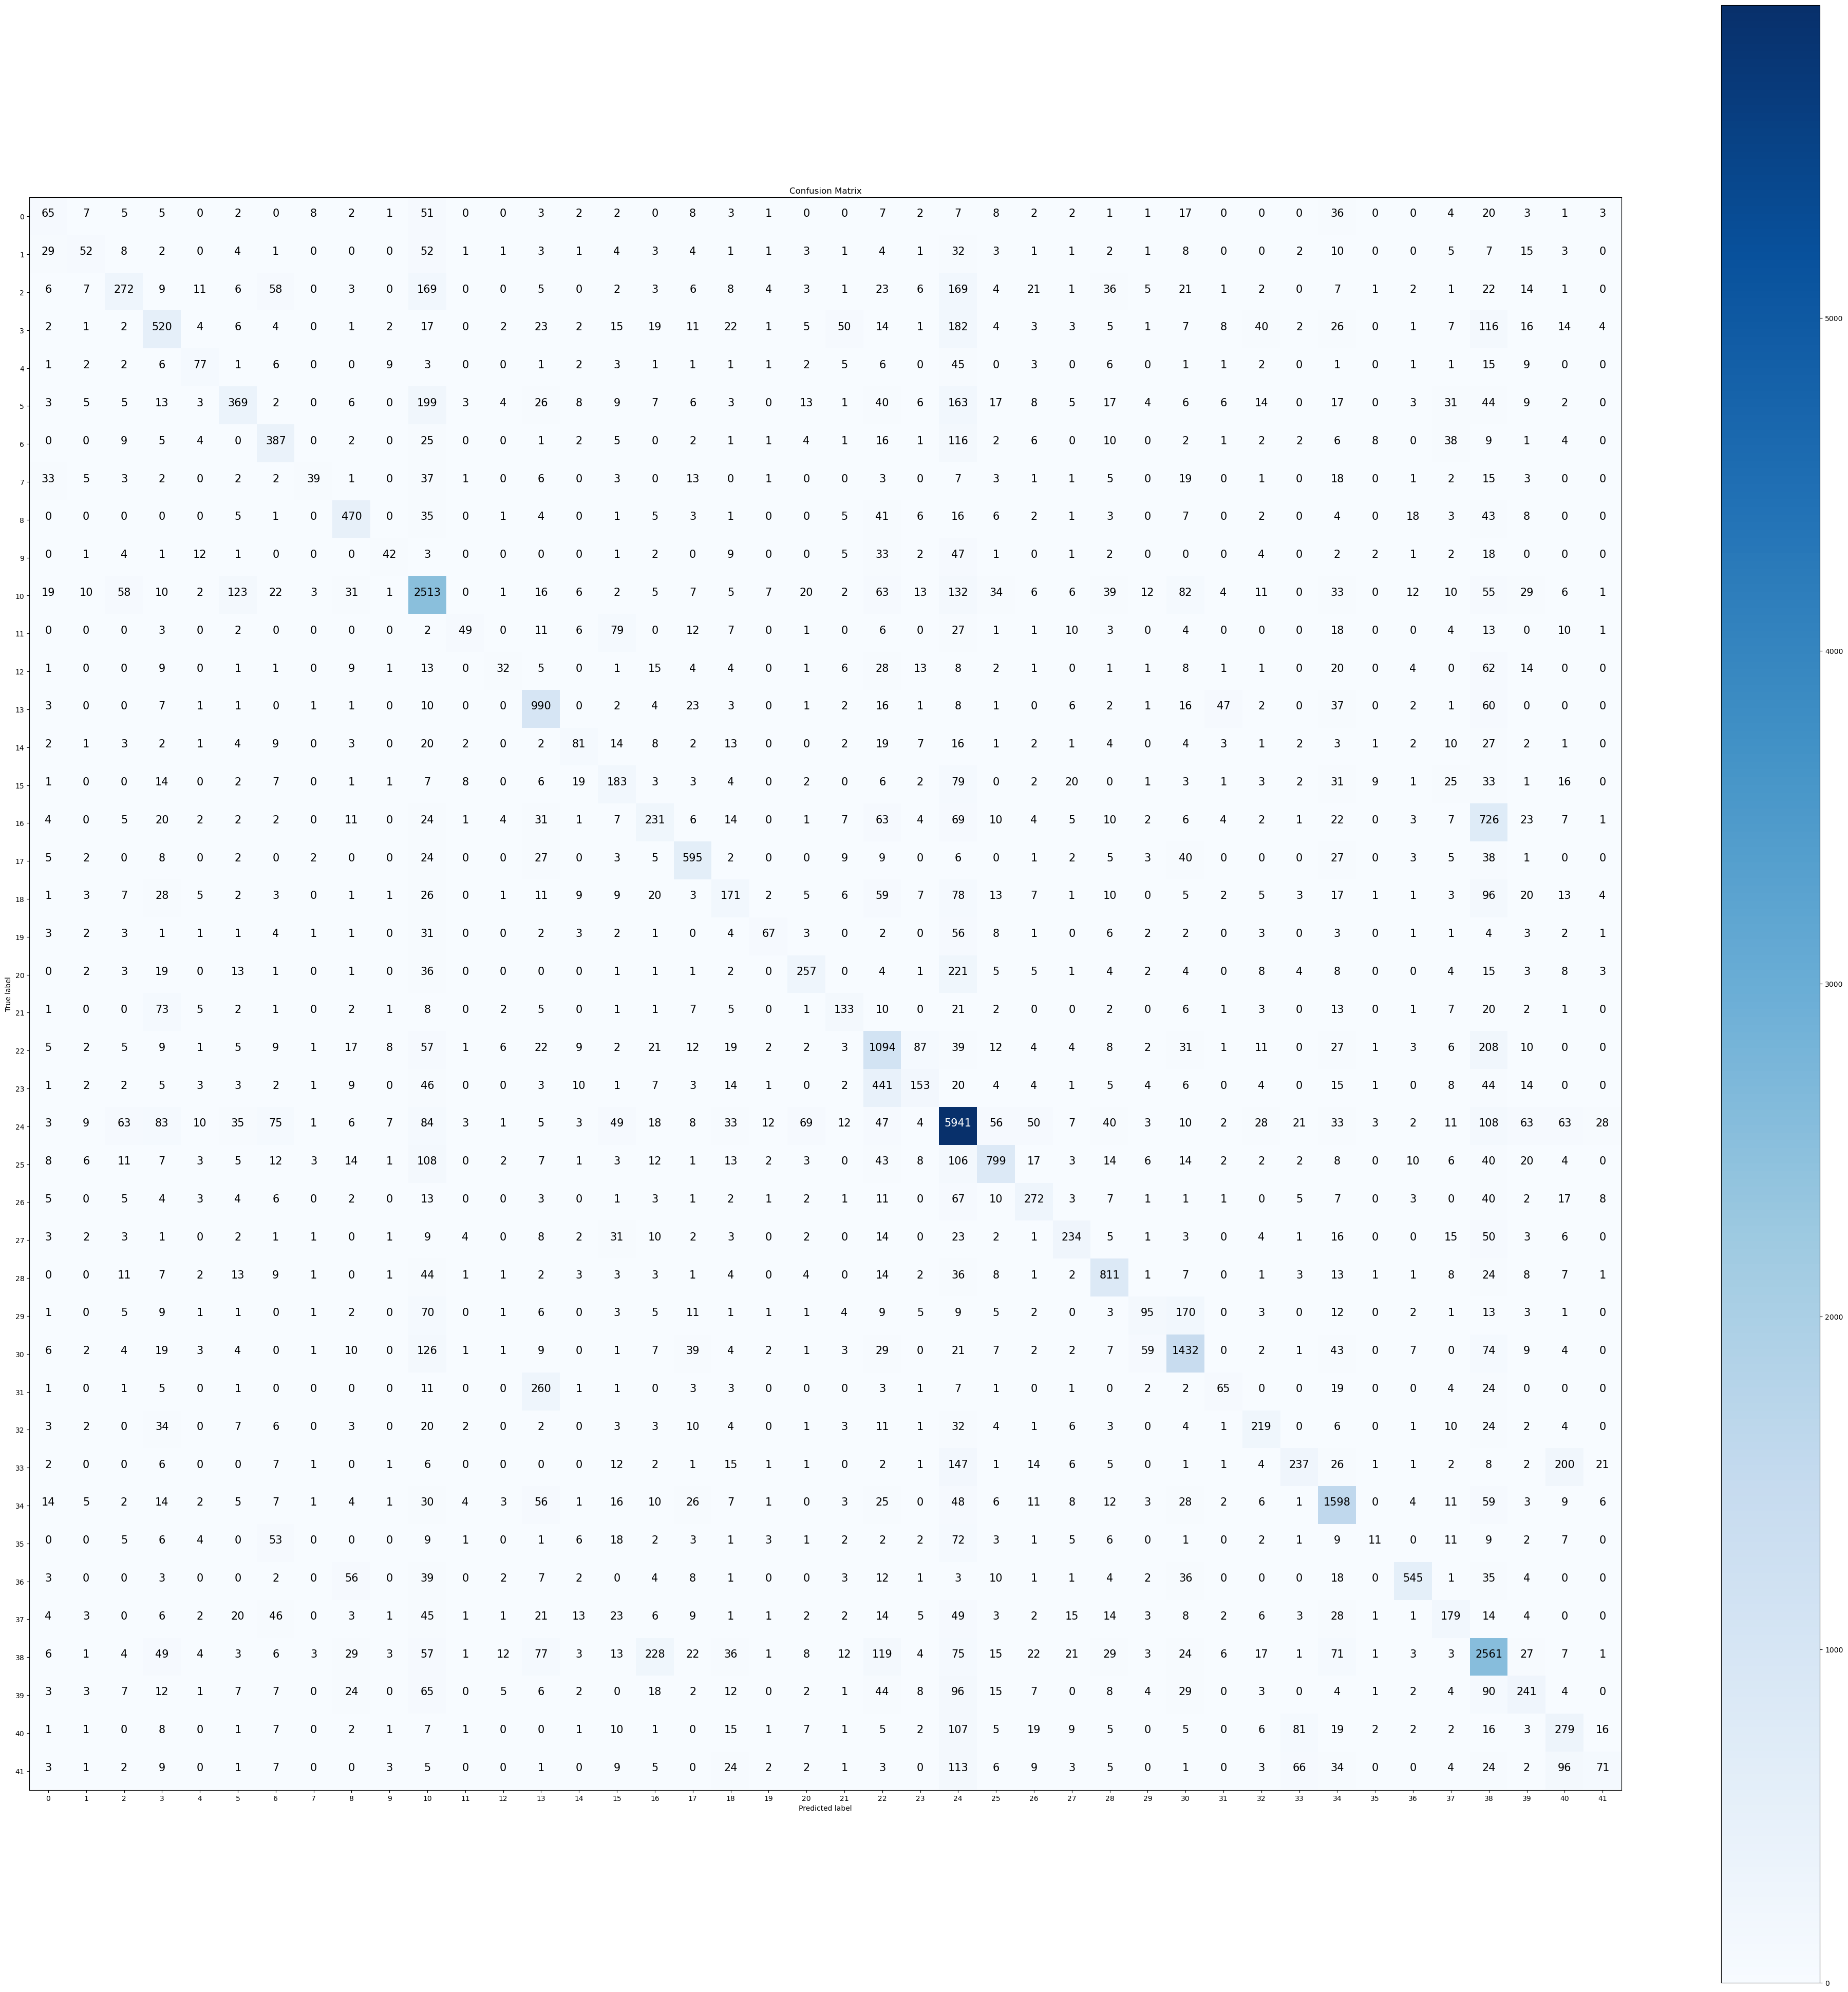

In [64]:
# Model 5 : Using custom embedding

inputs = layers.Input(shape=[], dtype="string")
embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4")(inputs)
dense_layer = layers.Dense(128, activation="relu")(embedding_layer)
outputs = layers.Dense(output_shape, activation="softmax")(dense_layer)
model_5 = tf.keras.models.Model(inputs, outputs)

model_5.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_5 = model_5.fit(train_dataset,
                       validation_data=test_dataset,
                       epochs=3)

model_5_score = model_5.evaluate(test_dataset)
model_5_score = model_5_score[1]
print(model_5_score)

create_summary(model_5, x_test, y_test, classes)